In [2]:
import pandas
from time import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import yellowbrick as yb

In [6]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]
kdd_data_10percent = pandas.read_csv("kddcup.data_10_percent_corrected", header=None, names = col_names)
kdd_data_10percent.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
X=data[features].as_matrix()
y=data.default.as_matrix()

NameError: name 'data' is not defined

In [7]:
kdd_data_10percent['label'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [8]:
num_features = [
    "duration","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"
]
features = kdd_data_10percent[num_features].astype(float)
features


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,181.0,5450.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,9.0,9.0,1.0,0.0,0.11,0.00,0.00,0.00,0.00,0.0
1,0.0,239.0,486.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,19.0,19.0,1.0,0.0,0.05,0.00,0.00,0.00,0.00,0.0
2,0.0,235.0,1337.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,29.0,29.0,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0
3,0.0,219.0,1337.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,39.0,39.0,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0
4,0.0,217.0,2032.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,49.0,49.0,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0
5,0.0,217.0,2032.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,59.0,59.0,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0
6,0.0,212.0,1940.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,69.0,1.0,0.0,1.00,0.04,0.00,0.00,0.00,0.0
7,0.0,159.0,4087.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,11.0,79.0,1.0,0.0,0.09,0.04,0.00,0.00,0.00,0.0
8,0.0,210.0,151.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,8.0,89.0,1.0,0.0,0.12,0.04,0.00,0.00,0.00,0.0
9,0.0,212.0,786.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,8.0,99.0,1.0,0.0,0.12,0.05,0.00,0.00,0.00,0.0


In [9]:
labels = kdd_data_10percent['label'].copy()
labels[labels!='normal.'] = 'attack.'
labels.value_counts()

attack.    396743
normal.     97278
Name: label, dtype: int64

In [10]:
features.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
from sklearn.preprocessing import MinMaxScaler
#features.apply(lambda x: MinMaxScaler().fit_transform(x))
#features.describe()
scaler = MinMaxScaler()
features[num_features] = scaler.fit_transform(features[num_features])


In [12]:
# clf = KNeighborsClassifier(n_neighbors = 5, algorithm = 'ball_tree', leaf_size=500)
# t0 = time()
# clf.fit(features,labels)
# tt = time()-t0
# print("Classifier trained in {} seconds".format(round(tt,3)))

In [40]:
kdd_data_corrected = pandas.read_csv("data/corrected", header=None, names = col_names)
kdd_data_corrected['label'].value_counts()

smurf.              164091
normal.              60593
neptune.             58001
snmpgetattack.        7741
mailbomb.             5000
guess_passwd.         4367
snmpguess.            2406
satan.                1633
warezmaster.          1602
back.                 1098
mscan.                1053
apache2.               794
processtable.          759
saint.                 736
portsweep.             354
ipsweep.               306
httptunnel.            158
pod.                    87
nmap.                   84
buffer_overflow.        22
multihop.               18
named.                  17
sendmail.               17
ps.                     16
xterm.                  13
rootkit.                13
teardrop.               12
land.                    9
xlock.                   9
xsnoop.                  4
ftp_write.               3
worm.                    2
perl.                    2
phf.                     2
udpstorm.                2
loadmodule.              2
sqlattack.               2
i

In [41]:
kdd_data_corrected['label'][kdd_data_corrected['label']!='normal.'] = 'anomaly'
kdd_data_corrected['label'].value_counts()

/home/prabhant/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


anomaly    250436
normal.     60593
Name: label, dtype: int64

In [42]:
kdd_data_corrected[num_features] = kdd_data_corrected[num_features].astype(float)
kdd_data_corrected[num_features]=scaler.fit_transform(kdd_data_corrected[num_features])

In [43]:
corrected=kdd_data_corrected

In [17]:
corrected.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,...,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000
mean,0.000310,0.000028,0.000144,0.000029,0.000254,0.000017,0.000145,0.000591,0.172476,0.000014,...,0.922677,0.781153,0.793494,0.024953,0.547919,0.004566,0.058764,0.058791,0.142659,0.141693
std,0.007063,0.002032,0.003098,0.005379,0.013456,0.003274,0.003090,0.012498,0.377794,0.002460,...,0.238876,0.393359,0.387090,0.096003,0.491963,0.035773,0.231296,0.232997,0.344380,0.346573
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.956863,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:

from sklearn.cluster import KMeans
k = 60
km = KMeans(n_clusters = k)

t0 = time()
km.fit(features)
tt = time()-t0
print("Clustered in {} seconds".format(round(tt,3)))

label_names = list(map(
    lambda x: pandas.Series([labels[i] for i in range(len(km.labels_)) if km.labels_[i]==x]), 
    range(k)))


# for i in range(k):
#     print("Cluster {} labels:".format(i))
#     print(label_names[i].value_counts())
#     print()

clusters = []
for i in range(len(label_names)):
    clusters.append(label_names[i].value_counts().index.tolist()[0])





Clustered in 124.351 seconds


In [100]:
y_kmeans = km.predict(features)

In [101]:
y_kmeans

array([45, 45, 45, ...,  8,  8,  8], dtype=int32)

In [102]:
corrected = kdd_data_corrected[num_features].astype(float)
true_labels = kdd_data_corrected['label'].copy()
true_labels[true_labels!='normal.'] = 'anomaly'

In [103]:
t0 = time()
pred = km.predict(corrected)
tt = time() - t0
print("Assigned clusters in {} seconds".format(round(tt,3)))

new_labels = [] 
for i in pred:                   
    new_labels.append(clusters[i])


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, hamming_loss, jaccard_similarity_score, matthews_corrcoef, zero_one_loss

accuracy_score = accuracy_score(true_labels, new_labels)
print("\n\nAccuracy {} %".format(round(accuracy_score*100,3)))

confusion_matrix = confusion_matrix(true_labels, new_labels)
print("\n\nConfusion Matrix: \n\n {}".format(confusion_matrix))

classification_report = classification_report(true_labels, new_labels)
print("\n\nClassification Scores: \n\n {}".format(classification_report))



Assigned clusters in 0.312 seconds


Accuracy 91.719 %


Confusion Matrix: 

 [[225790  24646]
 [  1110  59483]]


Classification Scores: 

              precision    recall  f1-score   support

    anomaly       1.00      0.90      0.95    250436
    normal.       0.71      0.98      0.82     60593

avg / total       0.94      0.92      0.92    311029



In [46]:
df=kdd_data_10percent

In [57]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [49]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

In [50]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,is_train
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,False
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,True
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,True
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,True
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,False


In [64]:
train, test = df[df['is_train']==True], df[df['is_train']==False]

In [65]:
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 370725
Number of observations in the test data: 123296


In [66]:
y = pd.factorize(train['label'])[0]

In [67]:
train['protocol_type'] = pd.factorize(train['protocol_type'])[0]
train['flag'] = pd.factorize(train['flag'])[0]
train['service'] = pd.factorize(train['service'])[0]

/home/prabhant/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/prabhant/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/prabhant/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [68]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)

In [69]:
new_features = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"]

In [70]:
clf.fit(train[new_features], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [72]:
test['protocol_type'] = pd.factorize(test['protocol_type'])[0]
test['flag'] = pd.factorize(test['flag'])[0]
test['service'] = pd.factorize(test['service'])[0]
test['label'] = pd.factorize(test['label'])[0]

/home/prabhant/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/prabhant/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/prabhant/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [73]:
clf.predict(test[new_features])

array([0, 0, 0, ..., 0, 0, 0])

In [74]:
preds = df.label[clf.predict(test[features])]

ValueError: Must pass DataFrame with boolean values only

# Part 2

In [76]:
y

array(['normal.', 'normal.', 'normal.', ..., 'normal.', 'normal.',
       'normal.'], dtype=object)

In [77]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [79]:
from sklearn import preprocessing

In [80]:
df.protocol_type = preprocessing.LabelEncoder().fit_transform(df["protocol_type"])
df.service = preprocessing.LabelEncoder().fit_transform(df["service"])
df.flag = preprocessing.LabelEncoder().fit_transform(df["flag"])
df.label = preprocessing.LabelEncoder().fit_transform(df["label"])

In [82]:
X = df[col_names].as_matrix()
y = df.label.as_matrix()

In [83]:
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [84]:
print(clf.feature_importances_)

[ 0.00067084  0.00065825  0.04894337  0.11546567  0.08453068  0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.06514172  0.          0.          0.          0.          0.
  0.18131262  0.08683356  0.          0.          0.07568471  0.
  0.00363992  0.22194085  0.          0.          0.          0.00093093
  0.          0.11424687]


In [104]:
df=kdd_data_10percent

In [105]:
df.protocol_type = preprocessing.LabelEncoder().fit_transform(df["protocol_type"])
df.service = preprocessing.LabelEncoder().fit_transform(df["service"])
df.flag = preprocessing.LabelEncoder().fit_transform(df["flag"])
df.label = preprocessing.LabelEncoder().fit_transform(df["label"])

In [106]:
X = df[col_names].as_matrix()
y = df.label.as_matrix()

In [107]:
import pandas as pd
from time import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import yellowbrick as yb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.features.rankd import Rank1D, Rank2D 
from yellowbrick.features.radviz import RadViz 
from yellowbrick.features.pcoords import ParallelCoordinates 
from yellowbrick.features.jointplot import JointPlotVisualizer
from yellowbrick.features.pca import PCADecomposition
from yellowbrick.features.scatter import ScatterVisualizer
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer

/usr/local/lib/python3.5/dist-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.5/dist-packages/scipy/stats/morestats.py:1323: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


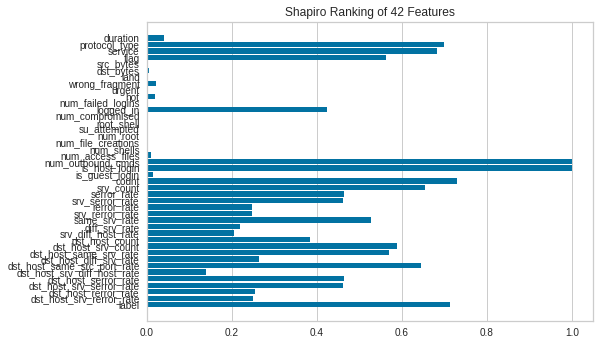

In [108]:
visualizer = Rank1D(features=col_names, algorithm='shapiro')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.5/dist-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


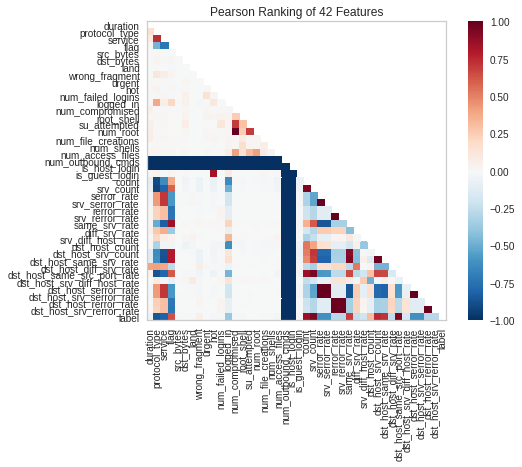

In [109]:
visualizer = Rank2D(features=col_names, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()    # Draw/show/poof the data


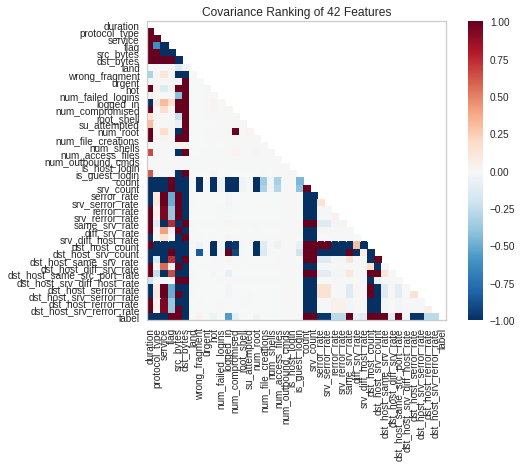

In [111]:
visualizer = Rank2D(features=col_names, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()    # Draw/show/poof the data


In [118]:
import seaborn as sns
%matplotlib inline

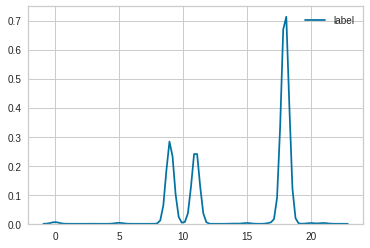

In [119]:
sns.kdeplot(df.label)

In [165]:
sns.distplot(data.label)

NameError: name 'data' is not defined

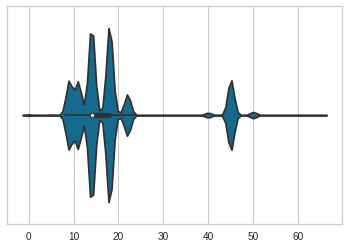

In [121]:
sns.violinplot([df.service, df.label])

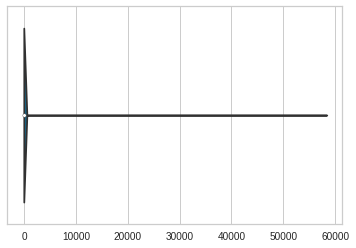

In [123]:
sns.violinplot([df.duration, df.label])

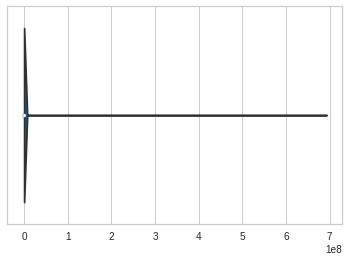

In [126]:
sns.violinplot([df.src_bytes, df.label])

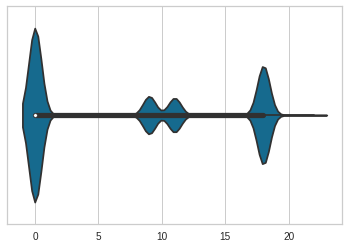

In [127]:
sns.violinplot([df.wrong_fragment, df.label])

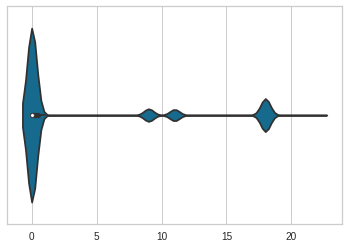

In [137]:
sns.violinplot([df.land, df.dst_host_srv_diff_host_rate,df.wrong_fragment ,df.label])

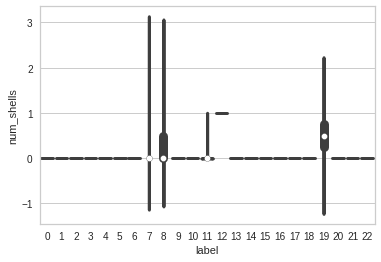

In [148]:
sns.violinplot(x="label",y="num_shells",data=df, inner="box", palette="Set1", cut=2, linewidth=3)

In [154]:
n_digits = len(np.unique(corrected.label))

AttributeError: 'DataFrame' object has no attribute 'label'

In [149]:
from sklearn.decomposition import PCA

In [155]:
reduced_data = PCA(n_components=2).fit_transform(corrected)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=23, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

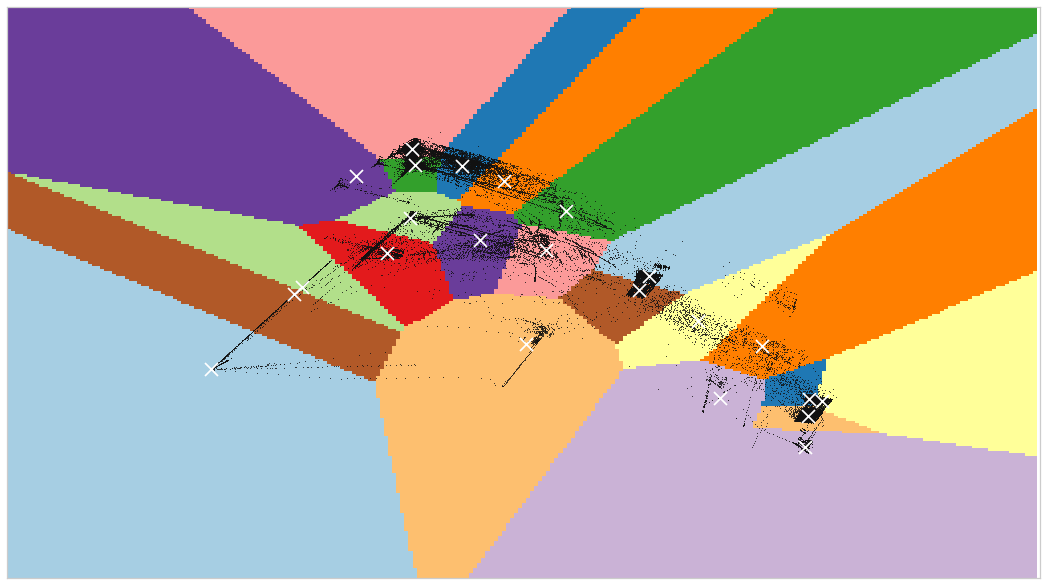

In [163]:
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=500)
plt.show()